### Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Problem Statement Build a binary classification model that determines: Label = 1 → Image represents digit 4 Label = 0 → Image represents anything other than 4Train a Keras to classify digit 4 vs not-4 using MNIST.  

In [2]:
#Binary Classification with Keras using MNIST digit dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print(x_train.shape, y_train.shape)
y_train_bin = (y_train == 4).astype(int)
y_test_bin  = (y_test == 4).astype(int)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)
binary_classification_model_for_4 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

binary_classification_model_for_4.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

binary_classification_model_for_4.summary()
history = binary_classification_model_for_4.fit(
    x_train,
    y_train_bin,
    epochs=25,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

C:\Users\SUCHETA\anaconda3\envs\hf310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9794 - loss: 0.0613 - val_accuracy: 0.9922 - val_loss: 0.0235
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9950 - val_loss: 0.0193
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9942 - val_loss: 0.0172
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9978 - loss: 0.0073 - val_accuracy: 0.9950 - val_loss: 0.0179
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9984 - loss: 0.0047 - val_accuracy: 0.9940 - val_loss: 0.0200
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9953 - val_loss: 0.0201
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9950 - val_loss: 0.0243
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.

In [3]:
loss, acc = binary_classification_model_for_4.evaluate(x_test, y_test_bin, verbose=0)
print('Test Accuracy:', acc)

Test Accuracy: 0.9965999722480774


#### Visualizing Confidence on Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


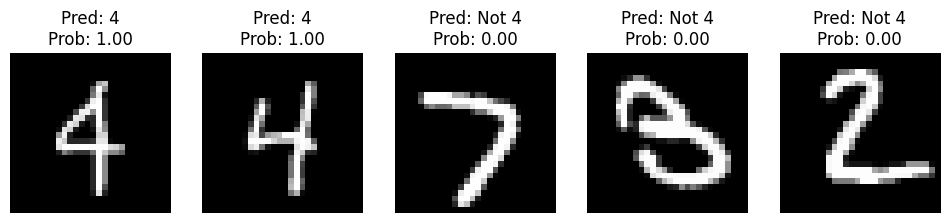

In [4]:
indices = [159, 19, 17, 18,1 ]
samples = x_test[indices]
preds = binary_classification_model_for_4.predict(samples)

plt.figure(figsize=(12, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.axis('off')
    prob = preds[i][0]
    label = '4' if prob >= 0.5 else 'Not 4'
    plt.title(f'Pred: {label}\nProb: {prob:.2f}')
plt.show()

### Problem Statement Build a binary classification model that determines: Label = 1 → Image represents digit 4 Label = 0 → Image represents anything other than 4Train a Keras CNN to classify digit 4 vs not-4 using MNIST.  

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

# Reshape for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

y_train_bin = (y_train == 4).astype(int)
y_test_bin  = (y_test == 4).astype(int)

print('Number of 4s:', y_train_bin.sum())

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train_cnn,
    y_train_bin,
    epochs=25,
    batch_size=128,
    validation_split=0.1
)

(60000, 28, 28) (60000,)
Number of 4s: 5842
Epoch 1/25


C:\Users\SUCHETA\anaconda3\envs\hf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9795 - loss: 0.2161 - val_accuracy: 0.9963 - val_loss: 0.0160
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9955 - val_loss: 0.0159
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9963 - val_loss: 0.0148
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9976 - loss: 0.0067 - val_accuracy: 0.9968 - val_loss: 0.0111
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9967 - val_loss: 0.0154
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9982 - loss: 0.0043 - val_accuracy: 0.9968 - val_loss: 0.0205
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9970 - val_loss: 0.0171
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9984 - loss: 0.0048 - val_accurac

In [6]:
loss, acc = model.evaluate(x_test_cnn, y_test_bin)
print("Test Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9982 - loss: 0.0089
Test Accuracy: 0.998199999332428


#### Visualizing Confidence on Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


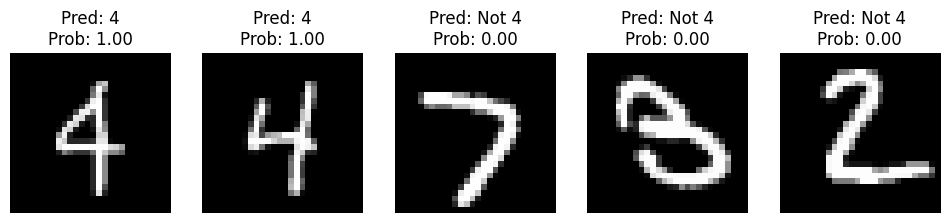

In [7]:
indices = [159, 19, 17, 18, 1]

samples_cnn = x_test[indices].reshape(-1, 28, 28, 1)

preds = model.predict(samples_cnn)

plt.figure(figsize=(12, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')

    prob = preds[i][0]
    label = '4' if prob >= 0.5 else 'Not 4'
    plt.title(f'Pred: {label}\nProb: {prob:.2f}')

plt.show()